In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

from exact import (
    antiferro_hom_unfrustrated_small_spins,
    antiferro_hom_unfrustrated_big_spins,
    lanczos_ed,
)

# Comparison big vs small spins

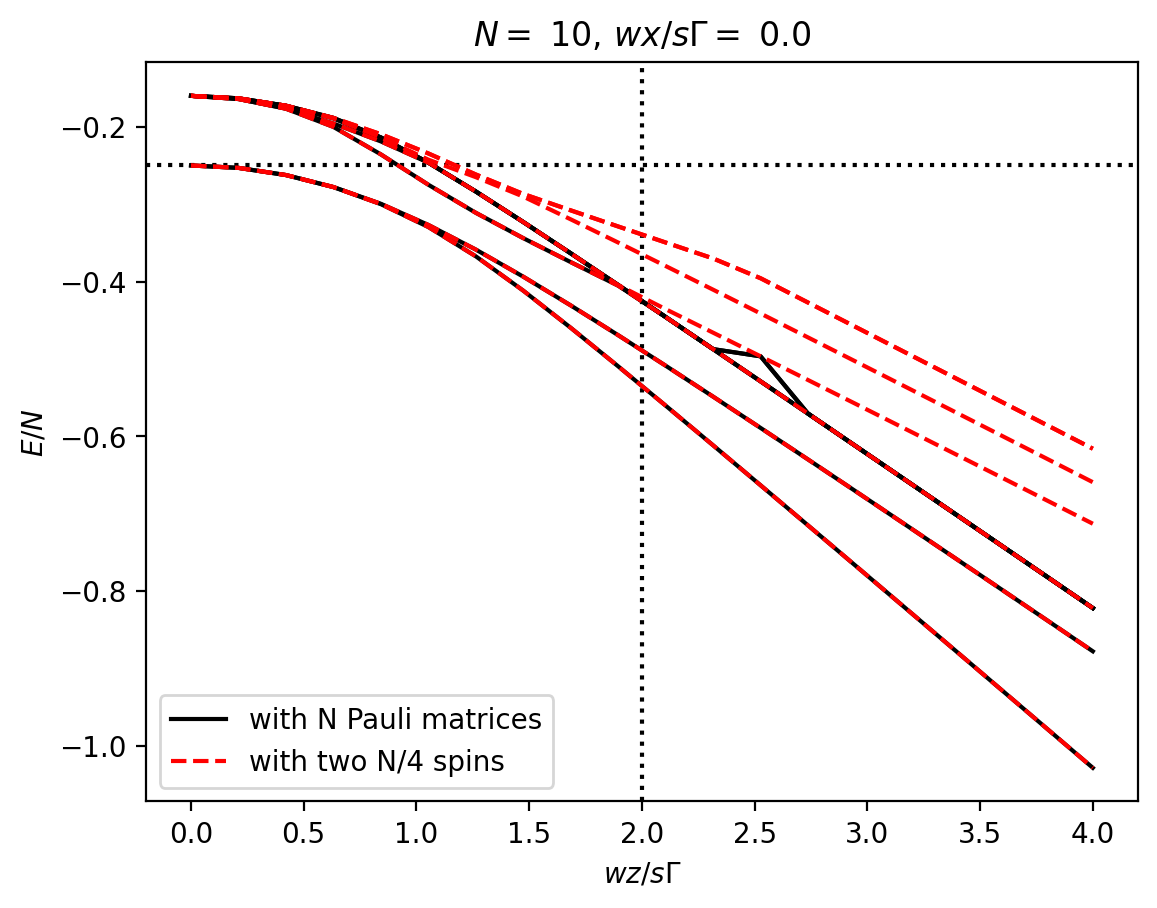

In [2]:
N = 10
G = 1
s = 1 / 2
wx = 0.0 * s * G
wzs = np.linspace(0.001, 4, 20) * s * G

energies_small = []
energies_big = []
for wz in wzs:
    H_small = antiferro_hom_unfrustrated_small_spins(wx, wz, G, N, s)
    vals = lanczos_ed(H_small, k=6)
    energies_small.append(vals / N)

    H_big = antiferro_hom_unfrustrated_big_spins(wx, wz, G, N, s)
    vals = lanczos_ed(H_big, k=6)
    energies_big.append(vals / N)

energies_small = np.array(energies_small)
energies_big = np.array(energies_big)

plt.plot(wzs / (s * G), energies_small, c="k")
plt.plot(
    wzs / (s * G), energies_small[:, -1], c="k", label="with N Pauli matrices"
)  # replot for single label
plt.plot(wzs / (s * G), energies_big, c="r", ls="dashed")
plt.plot(
    wzs / (s * G), energies_big[:, -1], c="r", ls="dashed", label="with two N/4 spins"
)  # replot for single label
plt.axvline(2, c="k", ls="dotted", zorder=0)
plt.axhline(-G * s**2, c="k", ls="dotted", zorder=0)
plt.xlabel(r"$wz/s\Gamma$")
plt.ylabel(r"$E/N$")
plt.title(rf"$N =$ {N}, $wx / s\Gamma =$ {wx / (s*G)}")
plt.legend()
plt.show()

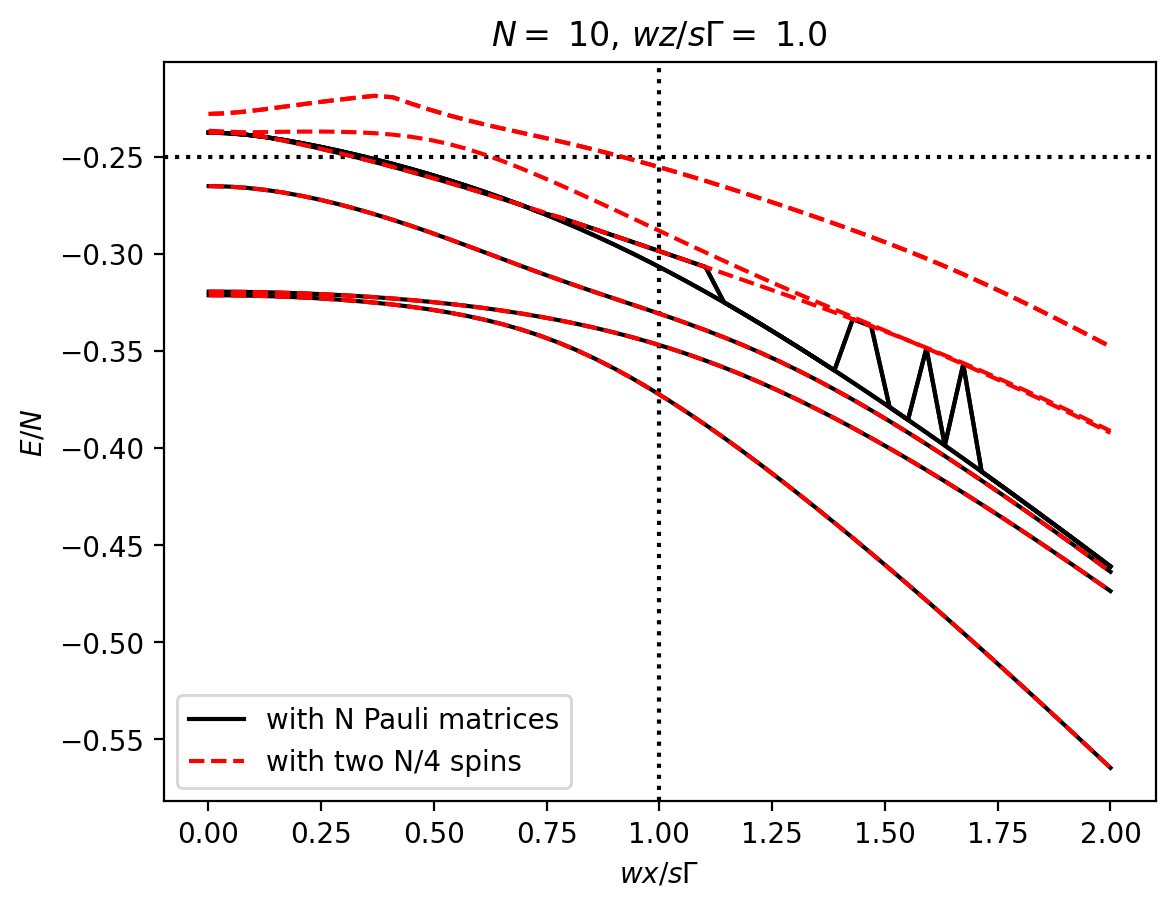

In [4]:
N = 10
G = 1
s = 1 / 2
wz = 0.0 * s * G
wxs = np.linspace(0.001, 2, 50) * s * G

energies_small = []
energies_big = []
for wx in wxs:
    H_small = antiferro_hom_unfrustrated_small_spins(wx, wz, G, N, s)
    vals = lanczos_ed(H_small, k=6)
    energies_small.append(vals / N)

    H_big = antiferro_hom_unfrustrated_big_spins(wx, wz, G, N, s)
    vals = lanczos_ed(H_big, k=6)
    energies_big.append(vals / N)

energies_small = np.array(energies_small)
energies_big = np.array(energies_big)

plt.plot(wxs / (s * G), energies_small, c="k")
plt.plot(
    wxs / (s * G), energies_small[:, -1], c="k", label="with N Pauli matrices"
)  # replot for single label
plt.plot(wxs / (s * G), energies_big, c="r", ls="dashed")
plt.plot(
    wxs / (s * G), energies_big[:, -1], c="r", ls="dashed", label="with two N/4 spins"
)  # replot for single label
plt.axvline(1, c="k", ls="dotted", zorder=0)
plt.axhline(-G * s**2, c="k", ls="dotted", zorder=0)
plt.xlabel(r"$wx/s\Gamma$")
plt.ylabel(r"$E/N$")
plt.title(rf"$N =$ {N}, $wz / s\Gamma =$ {wz / (s*G)}")
plt.legend()
plt.show()

# Levels with large N for big spin only

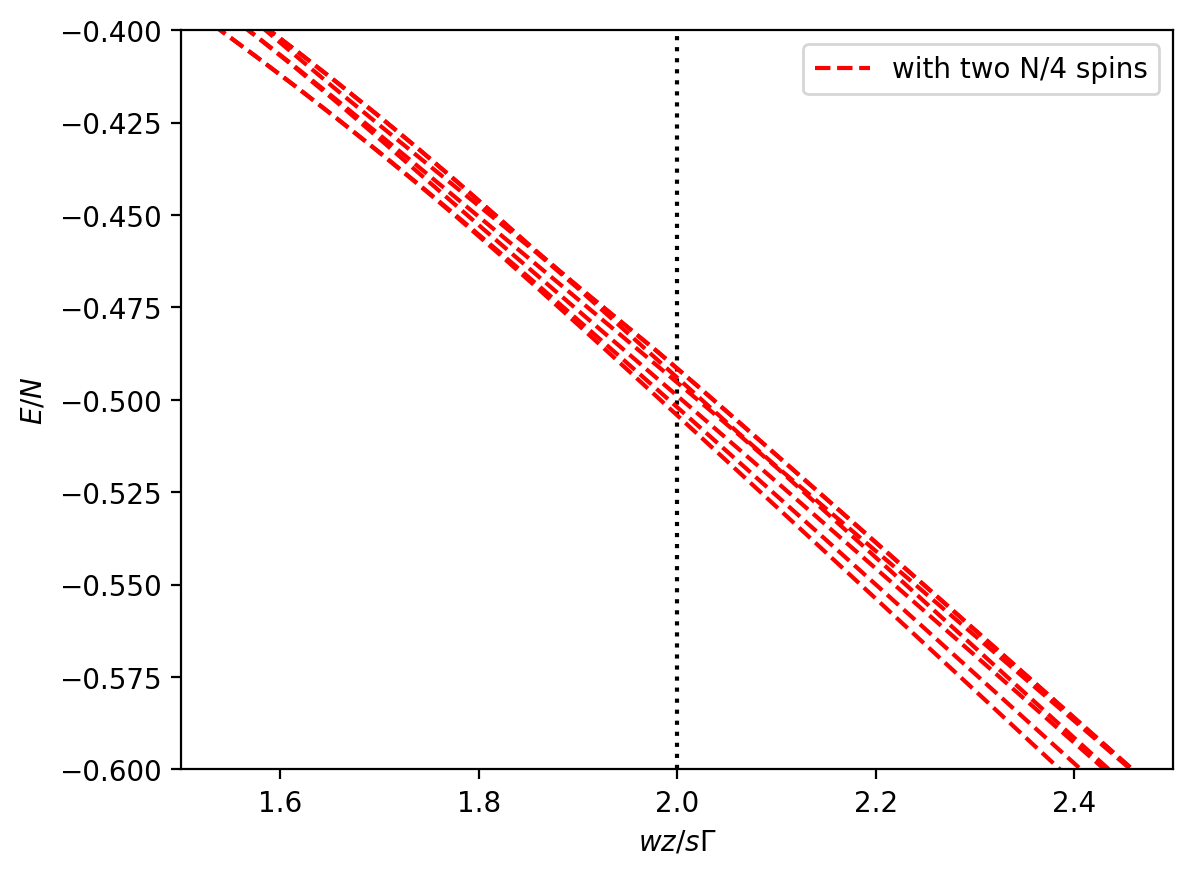

In [40]:
N = 100
G = 1
s = 1 / 2
wx = 0.0 * s * G
wzs = np.linspace(0.001, 4, 100) * s * G

energies_big = []
for wz in wzs:
    H_big = antiferro_hom_unfrustrated_big_spins(wx, wz, G, N, s)
    vals = lanczos_ed(H_big, k=6)
    energies_big.append(vals / N)

energies_big = np.array(energies_big)

plt.plot(wzs / (s * G), energies_big, c="r", ls="dashed")
plt.plot(
    wzs / (s * G), energies_big[:, -1], c="r", ls="dashed", label="with two N/4 spins"
)  # replot for single label
plt.axvline(2, c="k", ls="dotted", zorder=0)
plt.axhline(-G * s**2, c="k", ls="dotted", zorder=0)
plt.xlabel(r"$wz/s\Gamma$")
plt.ylabel(r"$E/N$")
plt.ylim(-0.6, -0.4)
plt.xlim(1.5, 2.5)
plt.legend()
plt.show()

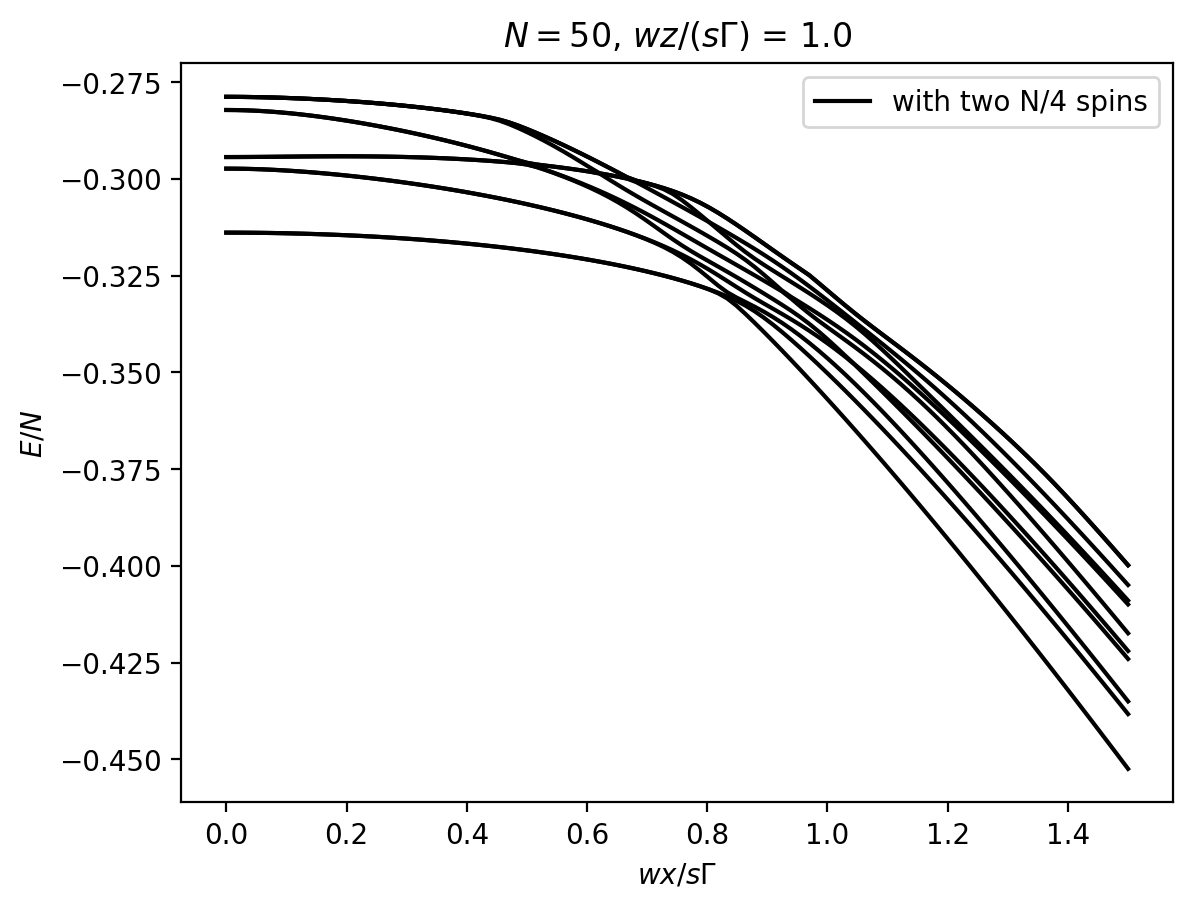

In [88]:
N = 50
G = 1
s = 1 / 2
wz = 1.0 * s * G
wxs = np.linspace(0.0, 1.5, 100) * s * G

energies_big = []
for wx in wxs:
    H_big = antiferro_hom_unfrustrated_big_spins(wx, wz, G, N, s)
    vals = lanczos_ed(H_big, k=10)
    energies_big.append(vals / N)

energies_big = np.array(energies_big)

plt.plot(wxs / (s * G), energies_big, c="k")
plt.plot(
    wxs / (s * G), energies_big[:, -1], c="k", label="with two N/4 spins"
)  # replot for single label
# plt.axvline(1, c='k', ls='dotted', zorder=0)
# plt.axhline(-G*s**2, c='k', ls='dotted', zorder=0)
plt.xlabel(r"$wx/s\Gamma$")
plt.ylabel(r"$E/N$")
# plt.ylim(-0.415, -0.4)
# plt.xlim(0.5, 0.7)
plt.title(rf"$N = ${N}, $wz/(s\Gamma)$ = {wz/(s*G)}")
plt.legend()
plt.show()

1.0


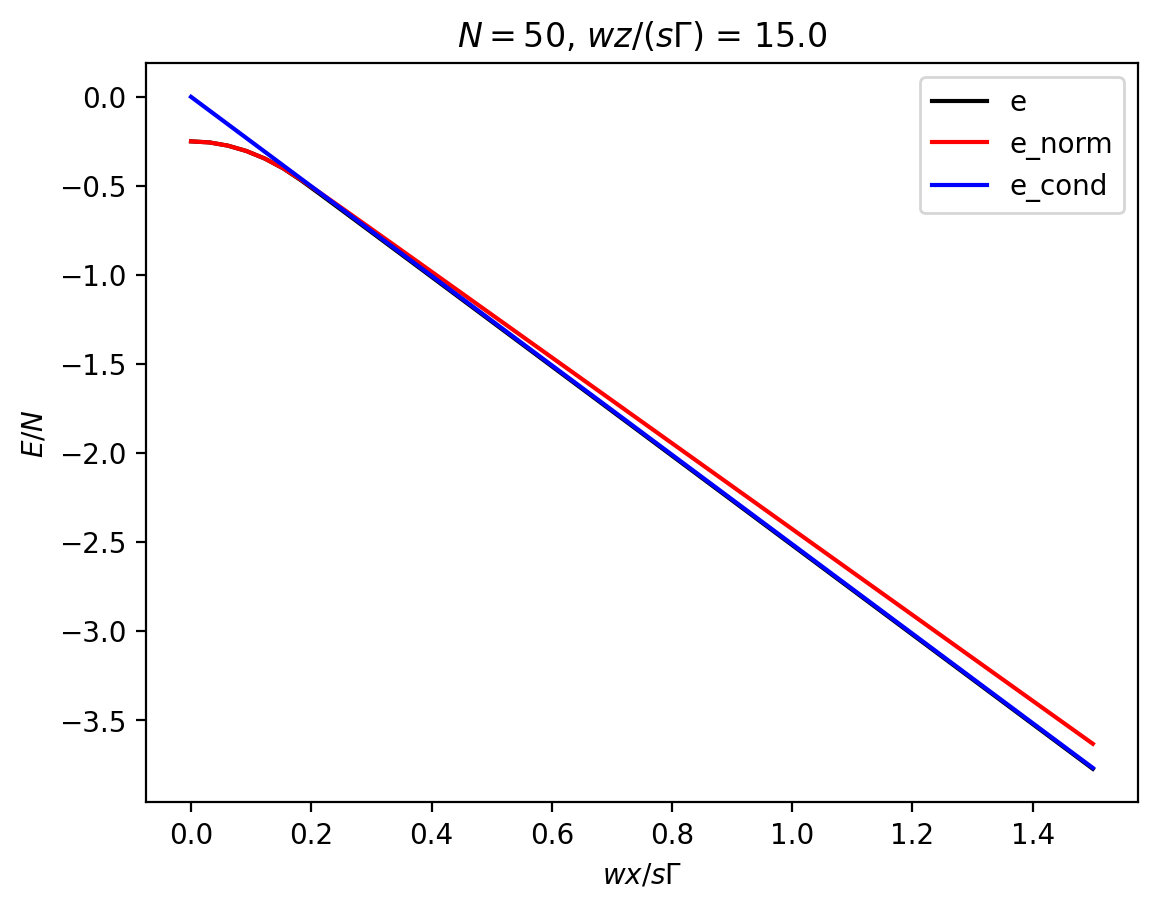

In [143]:
N = 50
G = 1
s = 1 / 2
# wz = 1. * s*G
wxs = np.linspace(0.0, 1.5, 50) * s * G

from scipy import sparse

print(wx / wz)

e0 = []
econd = []
e0norm = []
for wx in wxs:
    wz = 10 * wx
    H0 = antiferro_hom_unfrustrated_big_spins(wx, wz, G, N, s)
    vals = lanczos_ed(H0, k=1)
    e0.append(vals[0] / N)

    Hcond = antiferro_hom_unfrustrated_big_spins(wx, wz, 0, N, s)
    vals, vects = lanczos_ed(Hcond, k=1, compute_eigenvectors=True)

    Hnorm = antiferro_hom_unfrustrated_big_spins(wx, wz, G, N, s)
    Hnorm += N * G * sparse.csr_matrix(np.outer(vects[:, 0], vects[:, 0]))
    # Hnorm += N*G*sparse.csr_matrix(np.outer(vects[:, 1], vects[:, 1]))
    vals = lanczos_ed(Hnorm, k=1)
    e0norm.append(vals[0] / N)

    econd.append(-0.5 * np.sqrt(wx**2 + wz**2))

energies_big = np.array(energies_big)

plt.plot(wxs / (s * G), e0, c="k", label="e")
plt.plot(wxs / (s * G), e0norm, c="r", label="e_norm")
plt.plot(wxs / (s * G), econd, c="b", label="e_cond")
# plt.axvline(1, c='k', ls='dotted', zorder=0)
# plt.axhline(-G*s**2, c='k', ls='dotted', zorder=0)
plt.xlabel(r"$wx/s\Gamma$")
plt.ylabel(r"$E/N$")
# plt.ylim(-0.415, -0.4)
# plt.xlim(0.5, 0.7)
plt.title(rf"$N = ${N}, $wz/(s\Gamma)$ = {wz/(s*G)}")
plt.legend()
plt.show()

3.0


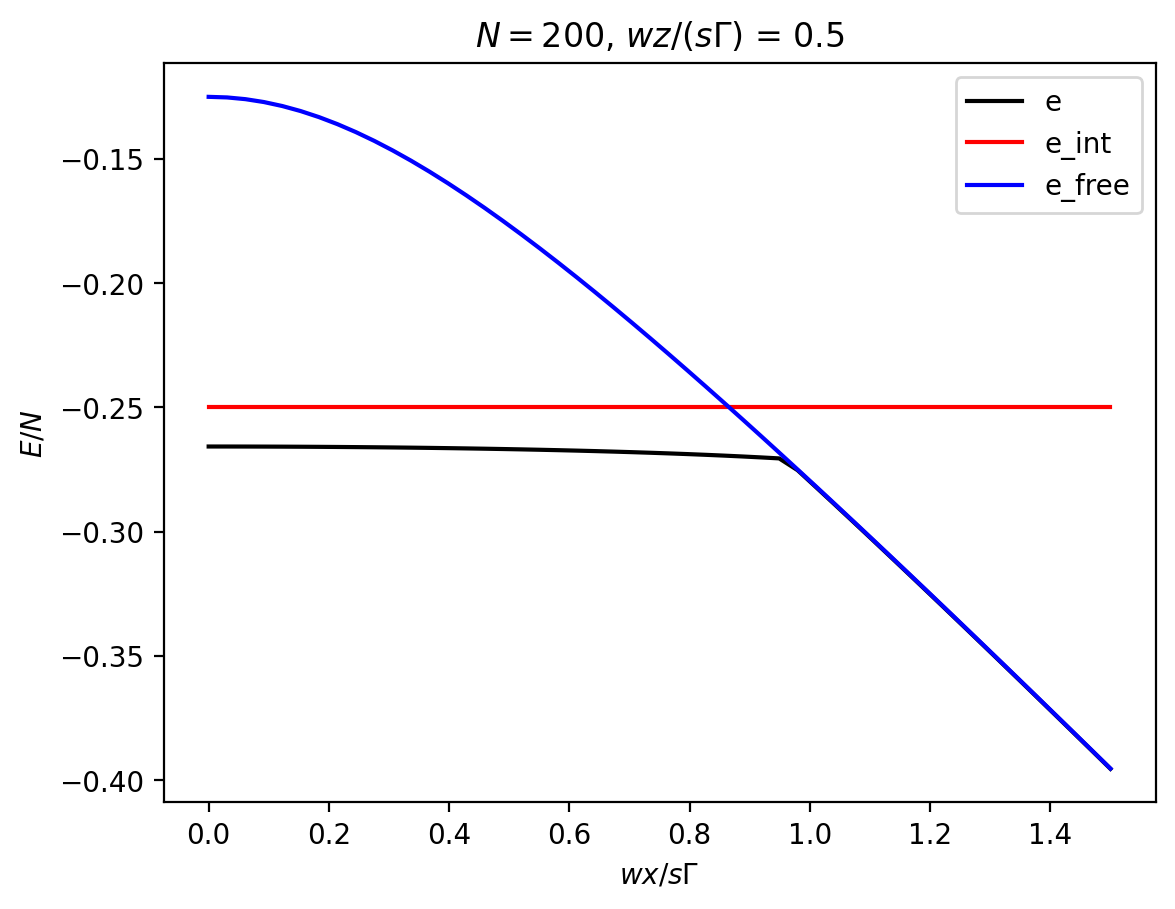

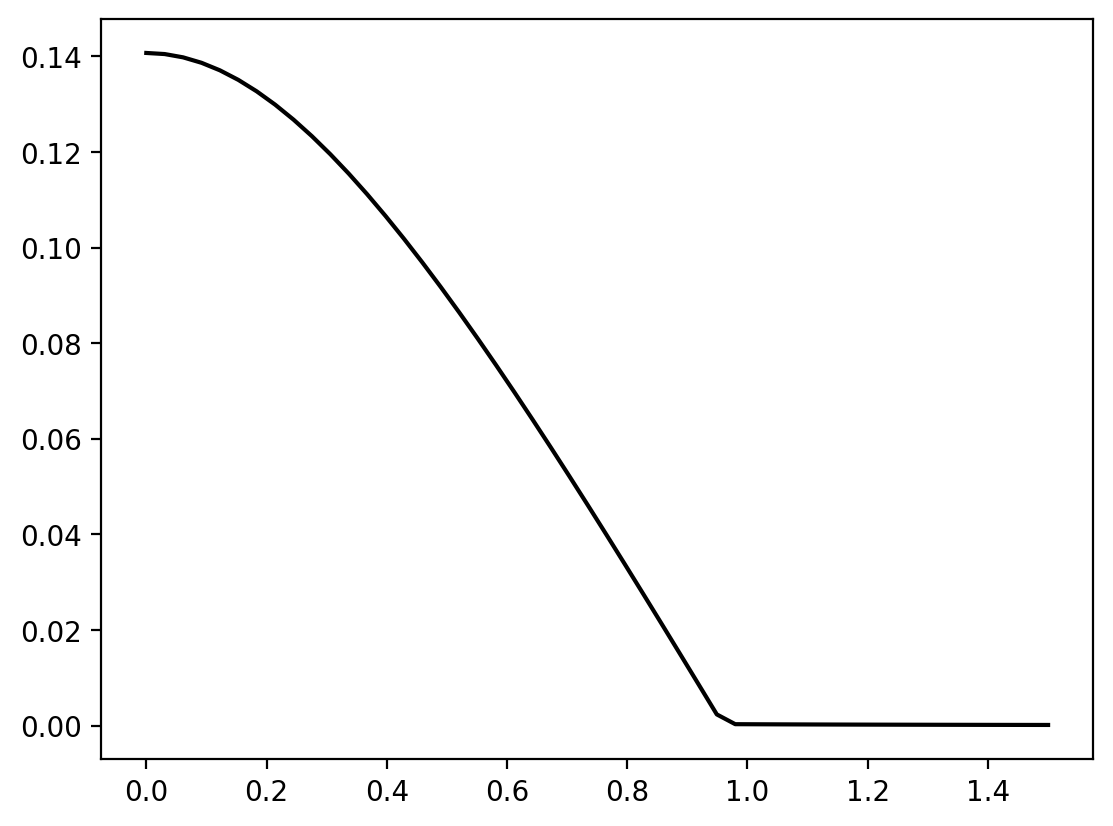

In [165]:
N = 200
G = 1
s = 1 / 2
wz = 0.5 * s * G
wxs = np.linspace(0.0, 1.5, 50) * s * G

from scipy import sparse

print(wx / wz)

e0 = []
e0inter = []
e0free = []
for wx in wxs:
    H0 = antiferro_hom_unfrustrated_big_spins(wx, wz, G, N, s)
    vals = lanczos_ed(H0, k=1)
    e0.append(vals[0] / N)

    Hinter = antiferro_hom_unfrustrated_big_spins(0, 0, G, N, s)
    vals = lanczos_ed(Hinter, k=1)
    e0inter.append(vals[0] / N)

    Hfree = antiferro_hom_unfrustrated_big_spins(wx, wz, 0, N, s)
    vals = lanczos_ed(Hfree, k=1)
    e0free.append(vals[0] / N)

plt.plot(wxs / (s * G), e0, c="k", label="e")
plt.plot(wxs / (s * G), e0inter, c="r", label="e_int")
plt.plot(wxs / (s * G), e0free, c="b", label="e_free")
# plt.axvline(1, c='k', ls='dotted', zorder=0)
# plt.axhline(-G*s**2, c='k', ls='dotted', zorder=0)
plt.xlabel(r"$wx/s\Gamma$")
plt.ylabel(r"$E/N$")
# plt.ylim(-0.415, -0.4)
# plt.xlim(0.5, 0.7)
plt.title(rf"$N = ${N}, $wz/(s\Gamma)$ = {wz/(s*G)}")
plt.legend()
plt.show()

plt.plot(wxs / (s * G), np.abs(np.array(e0) - np.array(e0free)), c="k", label="e")
plt.show()

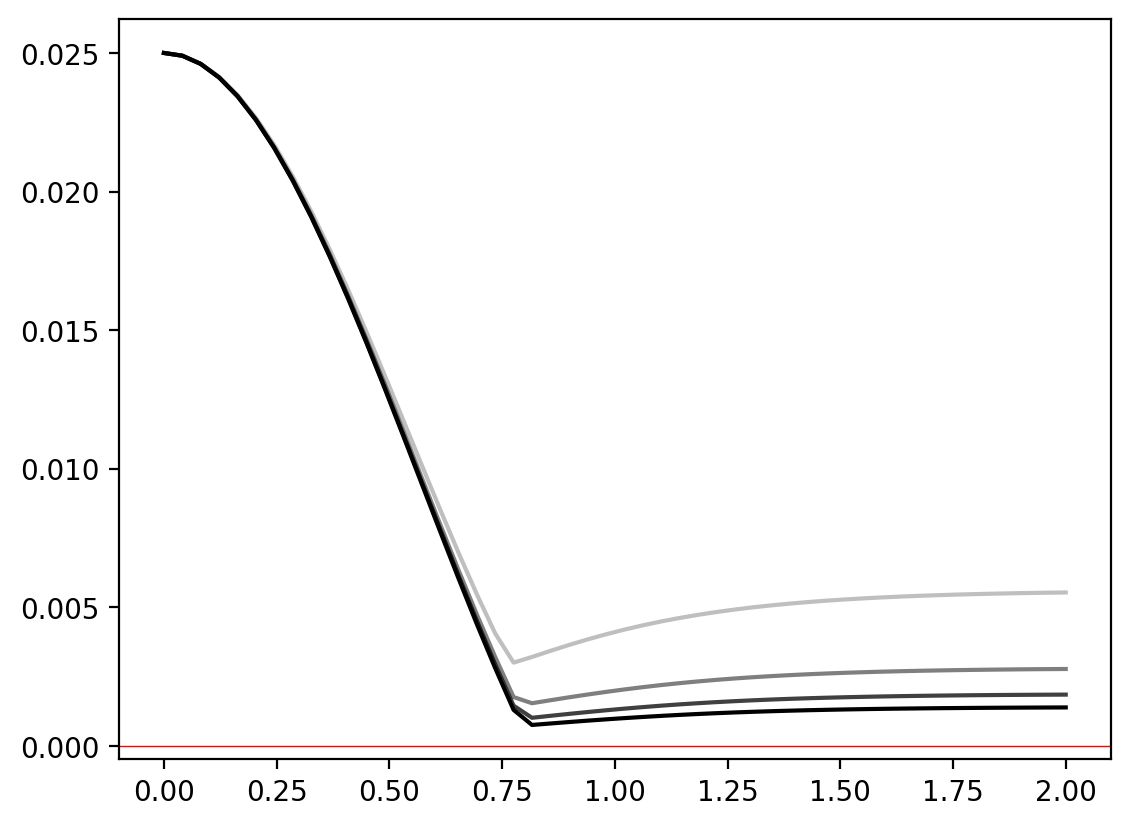

In [161]:
Ns = [50, 100, 150, 200]
G = 1
s = 1 / 2
wzs = np.linspace(0.0, 2, 50) * s * G
wx = 0.9 * s * G

for i, N in enumerate(Ns):
    e0 = np.empty(len(wzs))
    e0free = np.empty(len(wzs))

    for j, wz in enumerate(wzs):
        H0 = antiferro_hom_unfrustrated_big_spins(wx, wz, G, N, s)
        vals = lanczos_ed(H0, k=1)
        e0[j] = vals[0] / N

        Hfree = antiferro_hom_unfrustrated_big_spins(wx, wz, 0, N, s)
        vals = lanczos_ed(Hfree, k=1)
        e0free[j] = vals[0] / N

    plt.plot(
        wzs / (s * G),
        np.abs(np.array(e0) - np.array(e0free)),
        c="k",
        label="e",
        alpha=(i + 1) / len(Ns),
    )

plt.axhline(0, c="r", lw=0.5, zorder=0)
plt.show()

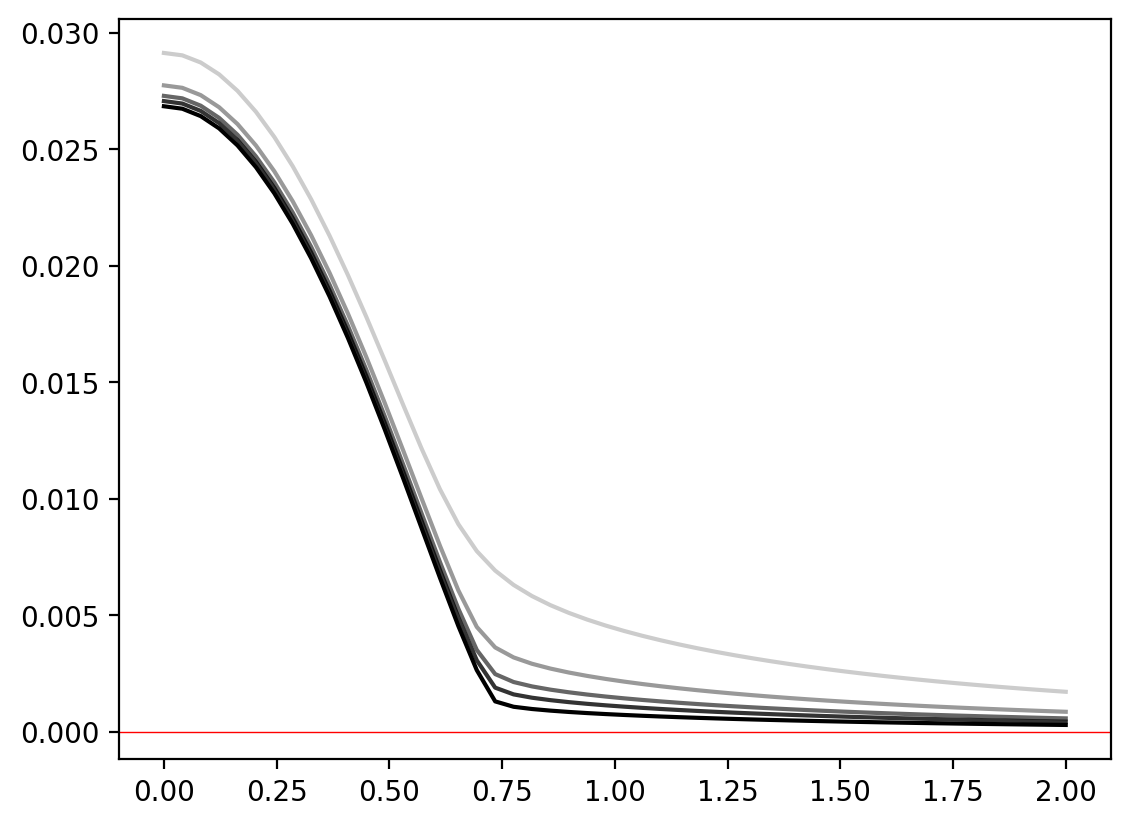

In [177]:
Ns = [50, 100, 150, 200, 300]
G = 1
s = 1 / 2
wxs = np.linspace(0.0, 2, 50) * s * G
wz = 1.35 * s * G

for i, N in enumerate(Ns):
    e0 = np.empty(len(wzs))
    e0free = np.empty(len(wzs))

    for j, wx in enumerate(wxs):
        H0 = antiferro_hom_unfrustrated_big_spins(wx, wz, G, N, s)
        vals = lanczos_ed(H0, k=1)
        e0[j] = vals[0] / N

        Hfree = antiferro_hom_unfrustrated_big_spins(wx, wz, 0, N, s)
        vals = lanczos_ed(Hfree, k=1)
        e0free[j] = vals[0] / N

    plt.plot(
        wxs / (s * G),
        np.abs(np.array(e0) - np.array(e0free)),
        c="k",
        label="e",
        alpha=(i + 1) / len(Ns),
    )

plt.axhline(0, c="r", lw=0.5, zorder=0)
plt.show()

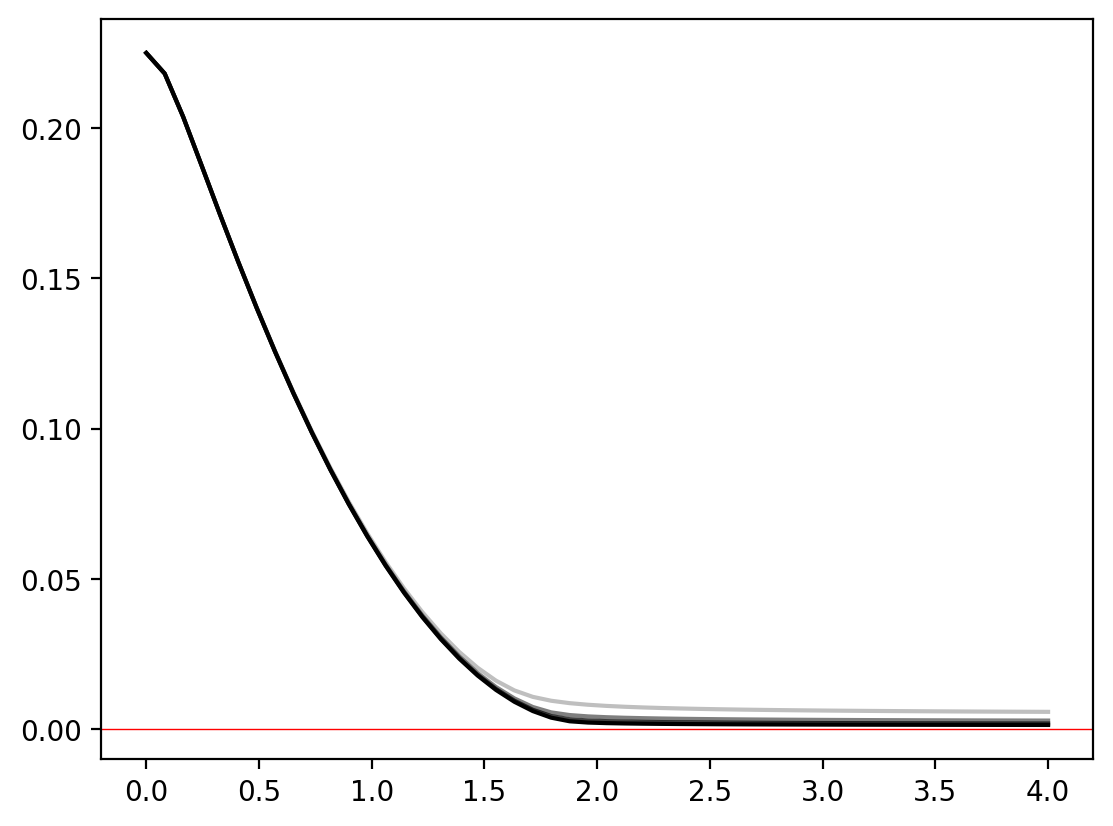

In [168]:
Ns = [50, 100, 150, 200]
G = 1
s = 1 / 2
wzs = np.linspace(0.0, 4, 50) * s * G
wx = 0.1 * s * G

for i, N in enumerate(Ns):
    e0 = np.empty(len(wzs))
    e0free = np.empty(len(wzs))

    for j, wz in enumerate(wzs):
        H0 = antiferro_hom_unfrustrated_big_spins(wx, wz, G, N, s)
        vals = lanczos_ed(H0, k=1)
        e0[j] = vals[0] / N

        Hfree = antiferro_hom_unfrustrated_big_spins(wx, wz, 0, N, s)
        vals = lanczos_ed(Hfree, k=1)
        e0free[j] = vals[0] / N

    plt.plot(
        wzs / (s * G),
        np.abs(np.array(e0) - np.array(e0free)),
        c="k",
        label="e",
        alpha=(i + 1) / len(Ns),
    )

plt.axhline(0, c="r", lw=0.5, zorder=0)
plt.show()

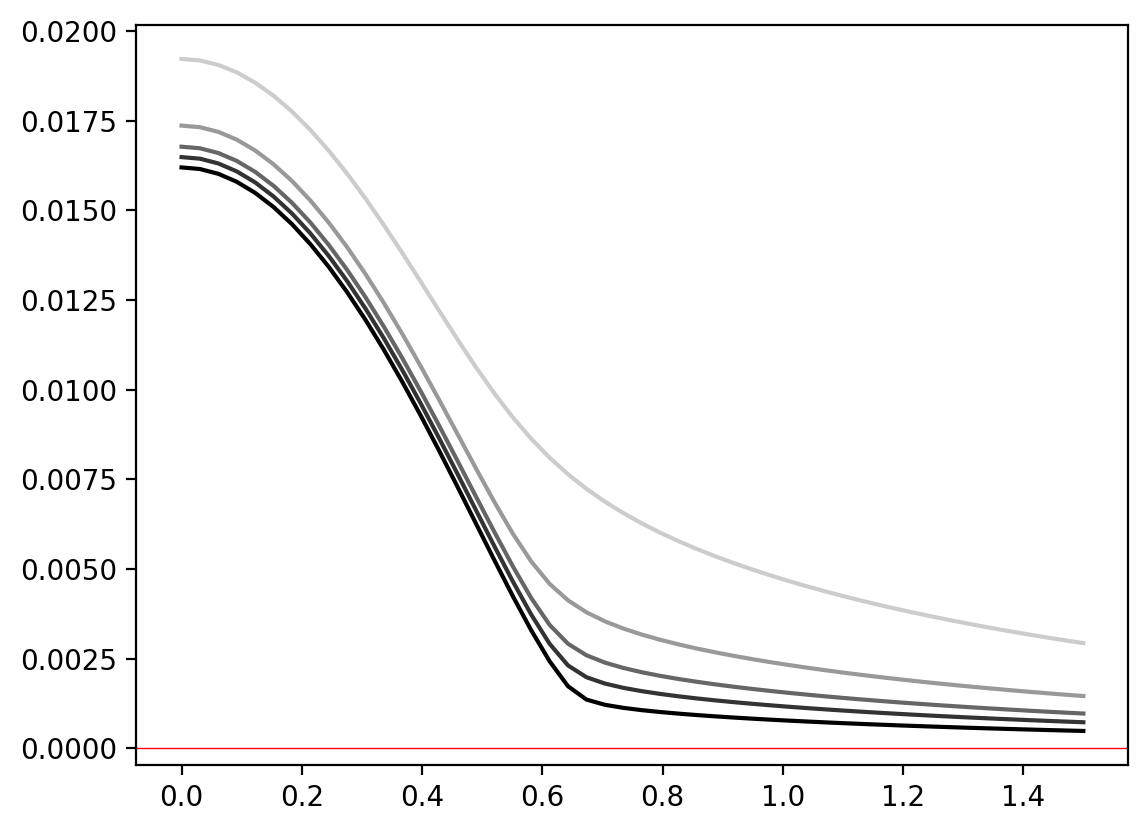

In [178]:
Ns = [50, 100, 150, 200, 300]
G = 1
s = 1 / 2
wxs = np.linspace(0.0, 1.5, 50) * s * G
wz = 1.5 * s * G

for i, N in enumerate(Ns):
    e0 = np.empty(len(wzs))
    e0free = np.empty(len(wzs))

    for j, wx in enumerate(wxs):
        H0 = antiferro_hom_unfrustrated_big_spins(wx, wz, G, N, s)
        vals = lanczos_ed(H0, k=1)
        e0[j] = vals[0] / N

        Hfree = antiferro_hom_unfrustrated_big_spins(wx, wz, 0, N, s)
        vals = lanczos_ed(Hfree, k=1)
        e0free[j] = vals[0] / N

    plt.plot(
        wxs / (s * G),
        np.abs(np.array(e0) - np.array(e0free)),
        c="k",
        label="e",
        alpha=(i + 1) / len(Ns),
    )

plt.axhline(0, c="r", lw=0.5, zorder=0)
plt.show()

# Gap for large N with big spin only

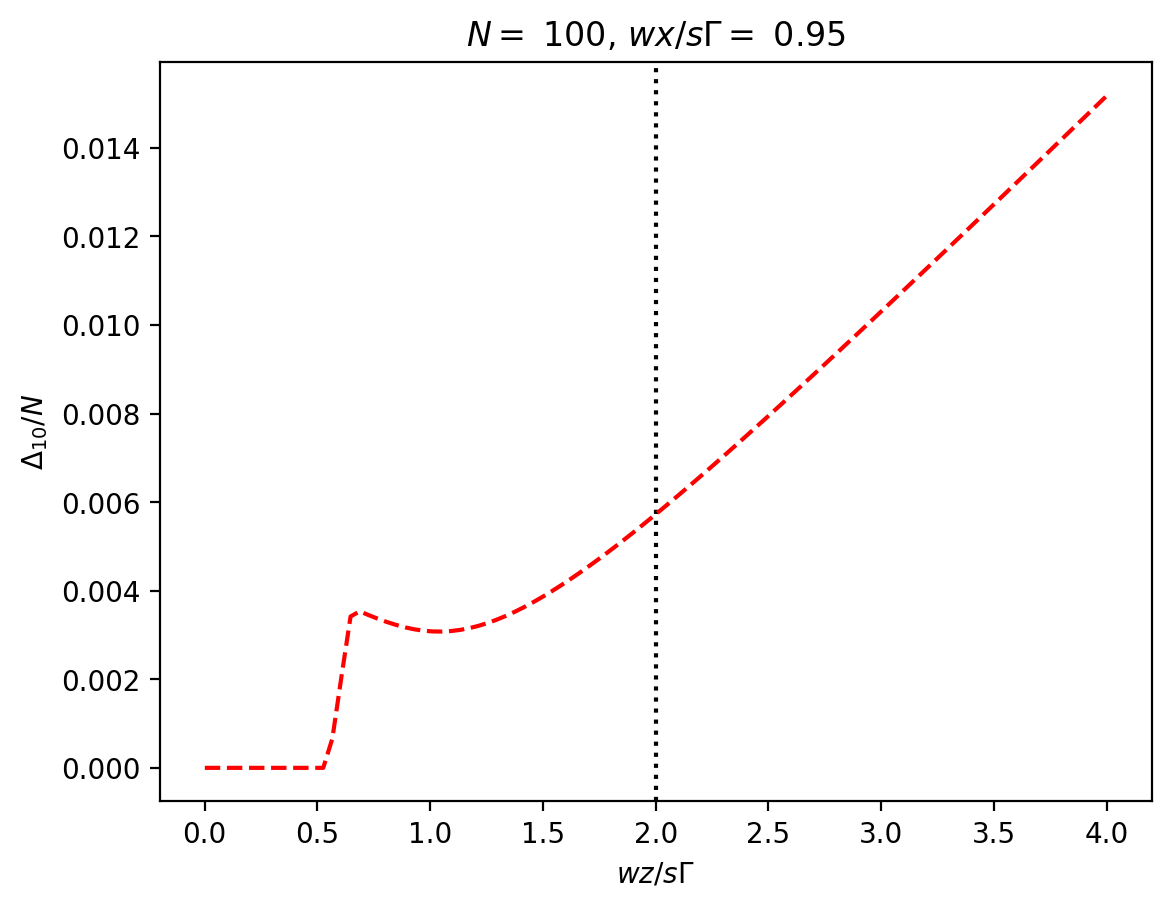

In [56]:
N = 100
G = 1
s = 1 / 2
wx = 0.95 * s * G
wzs = np.linspace(0.001, 4, 100) * s * G

energies_big = []
for wz in wzs:
    H_big = antiferro_hom_unfrustrated_big_spins(wx, wz, G, N, s)
    vals = lanczos_ed(H_big, k=2)
    energies_big.append((vals[1] - vals[0]) / N)

energies_big = np.array(energies_big)

plt.plot(wzs / (s * G), energies_big, c="r", ls="dashed")
plt.axvline(2, c="k", ls="dotted", zorder=0)
plt.xlabel(r"$wz/s\Gamma$")
plt.ylabel(r"$\Delta_{10}/N$")
# plt.ylim(-0.6, -0.4)
# plt.xlim(1.5, 2.5)
plt.title(rf"$N =$ {N}, $wx / s\Gamma =$ {wx / (s*G)}")
plt.show()

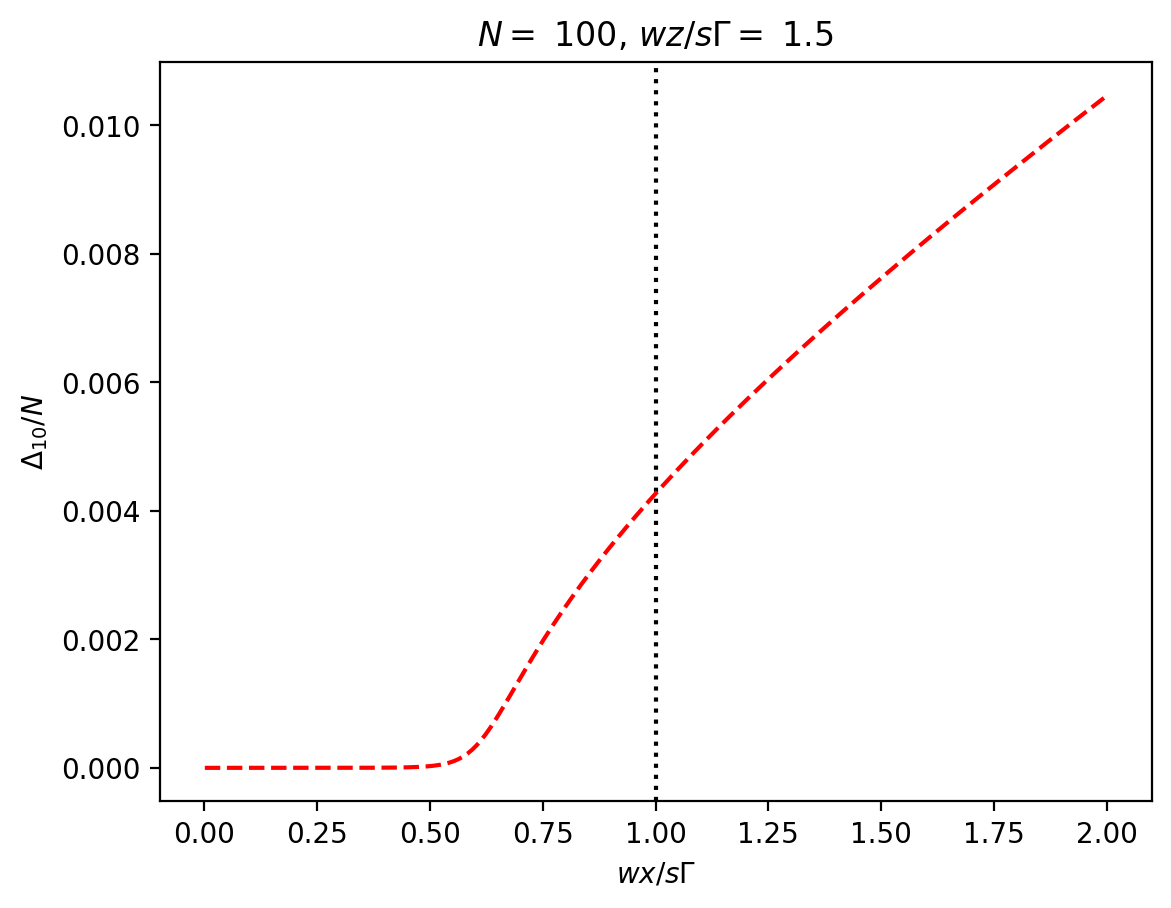

In [57]:
N = 100
G = 1
s = 1 / 2
wz = 1.5 * s * G
wxs = np.linspace(0.001, 2, 200) * s * G

energies_big = []
for wx in wxs:
    H_big = antiferro_hom_unfrustrated_big_spins(wx, wz, G, N, s)
    vals = lanczos_ed(H_big, k=2)
    energies_big.append((vals[1] - vals[0]) / N)

energies_big = np.array(energies_big)

plt.plot(wxs / (s * G), energies_big, c="r", ls="dashed")
plt.axvline(1, c="k", ls="dotted", zorder=0)
plt.xlabel(r"$wx/s\Gamma$")
plt.ylabel(r"$\Delta_{10}/N$")
# plt.ylim(-0.6, -0.4)
# plt.xlim(1.5, 2.5)
plt.title(rf"$N =$ {N}, $wz / s\Gamma =$ {wz / (s*G)}")
plt.show()

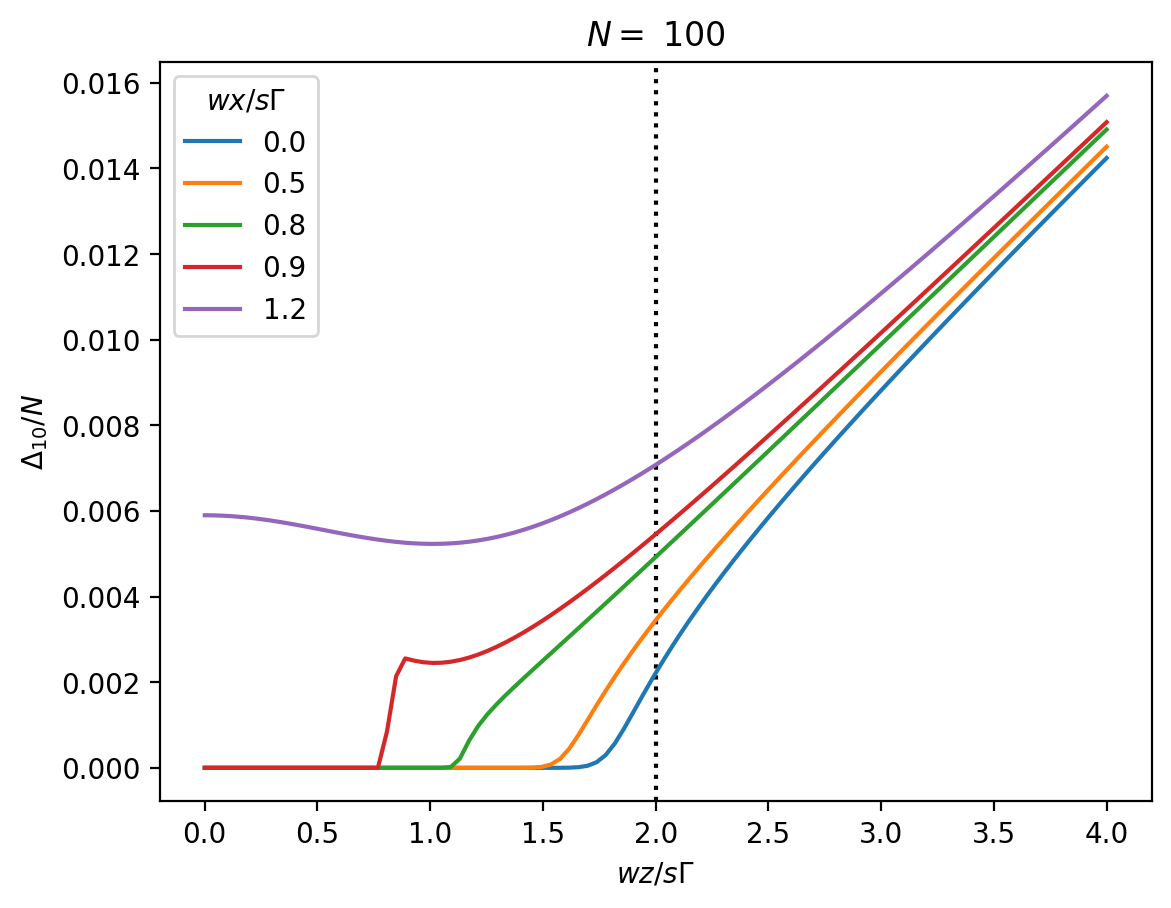

In [60]:
N = 100
G = 1
s = 1 / 2
wxs = np.array([0.0, 0.5, 0.8, 0.9, 1.2]) * s * G
wzs = np.linspace(0.001, 4, 100) * s * G

for wx in wxs:
    energies_big = []
    for wz in wzs:
        H_big = antiferro_hom_unfrustrated_big_spins(wx, wz, G, N, s)
        vals = lanczos_ed(H_big, k=2)
        energies_big.append((vals[1] - vals[0]) / N)

    energies_big = np.array(energies_big)

    plt.plot(wzs / (s * G), energies_big, label=wx / (s * G))

plt.axvline(2, c="k", ls="dotted", zorder=0)
plt.xlabel(r"$wz/s\Gamma$")
plt.ylabel(r"$\Delta_{10}/N$")
# plt.ylim(-0.6, -0.4)
# plt.xlim(1.5, 2.5)
plt.title(rf"$N =$ {N}")
plt.legend(title=r"$wx / s\Gamma$")
plt.show()

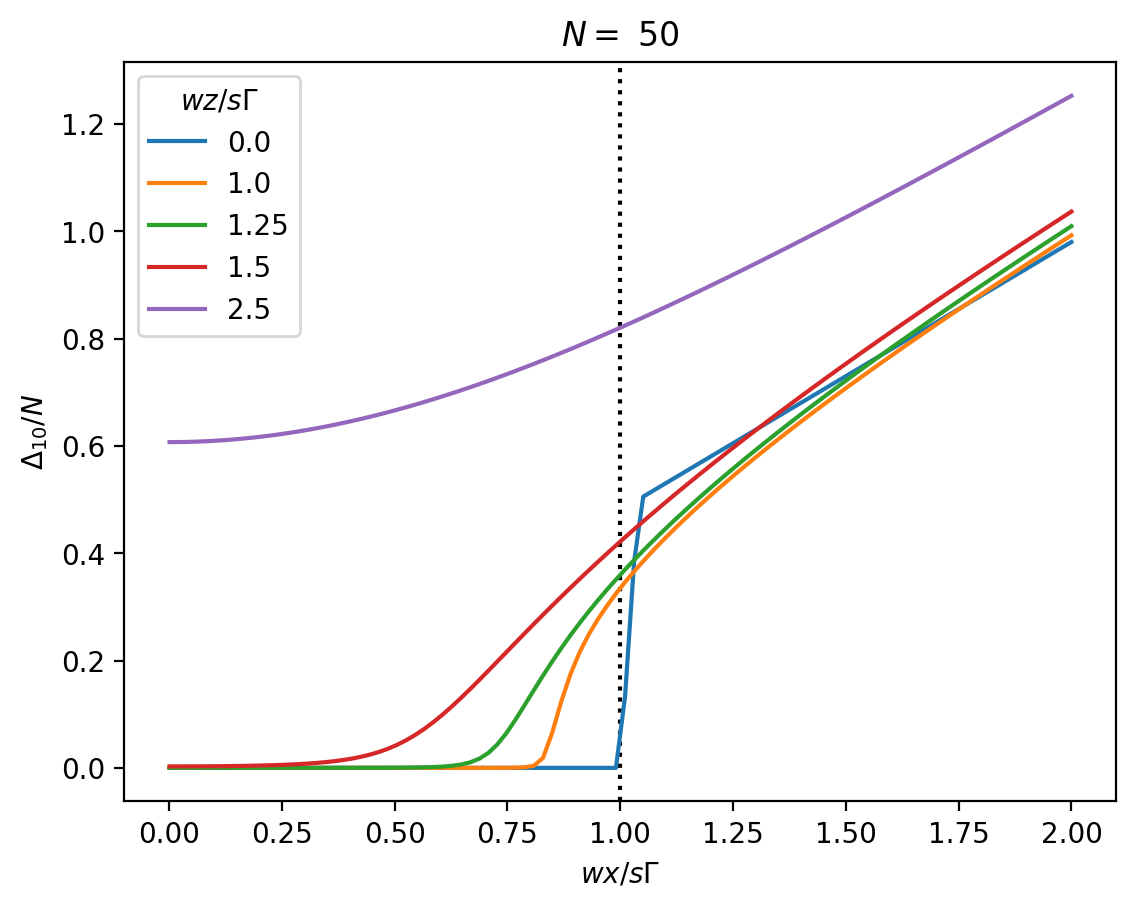

In [44]:
N = 50

G = 1
s = 1 / 2
wzs = np.array([0.0, 1.0, 1.25, 1.5, 2.5]) * s * G
wxs = np.linspace(0.001, 2, 100) * s * G

for wz in wzs:
    energies_big = []
    for wx in wxs:
        H_big = antiferro_hom_unfrustrated_big_spins(wx, wz, G, N, s)
        vals = lanczos_ed(H_big, k=2)
        energies_big.append((vals[1] - vals[0]))

    energies_big = np.array(energies_big)

    plt.plot(wxs / (s * G), energies_big, label=wz / (s * G))

plt.axvline(1, c="k", ls="dotted", zorder=0)
plt.xlabel(r"$wx/s\Gamma$")
plt.ylabel(r"$\Delta_{10}/N$")
# plt.ylim(-0.6, -0.4)
# plt.xlim(1.5, 2.5)
plt.legend(title=r"$wz / s\Gamma$")
plt.title(rf"$N =$ {N}")
plt.show()

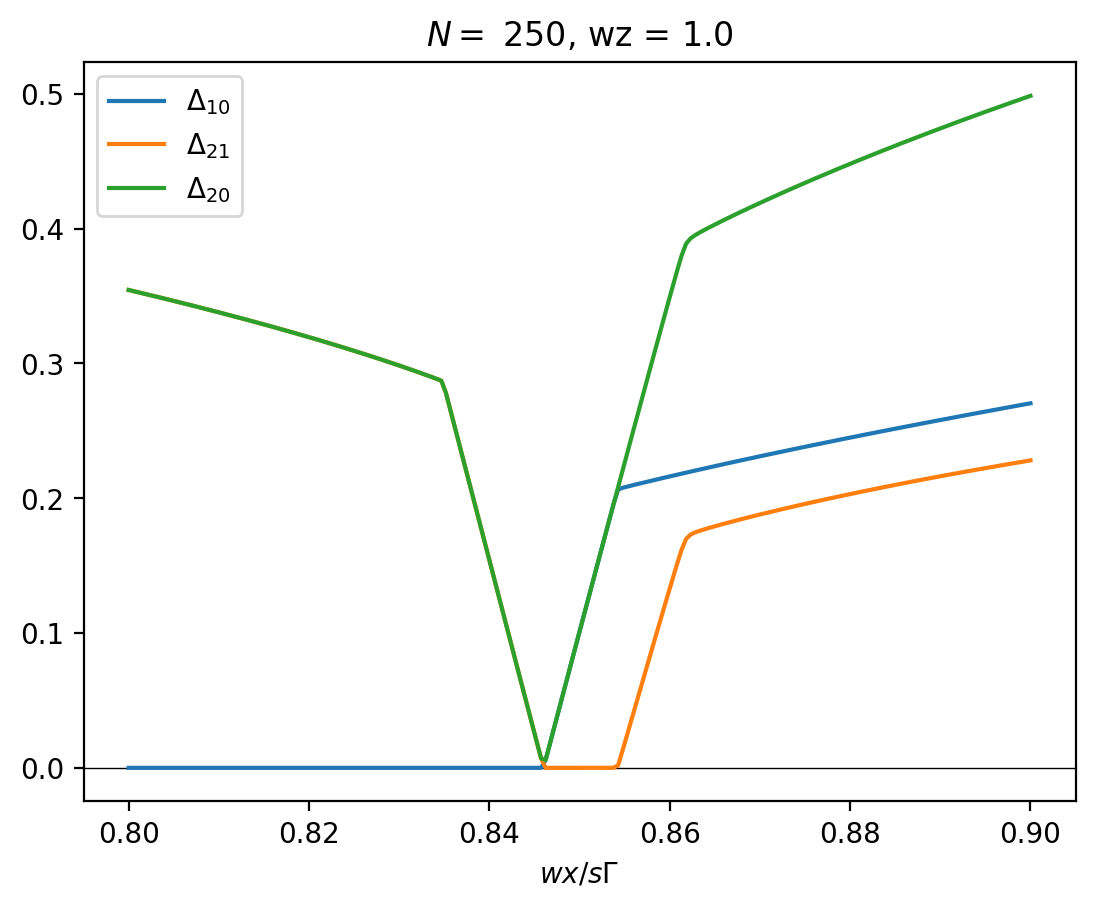

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


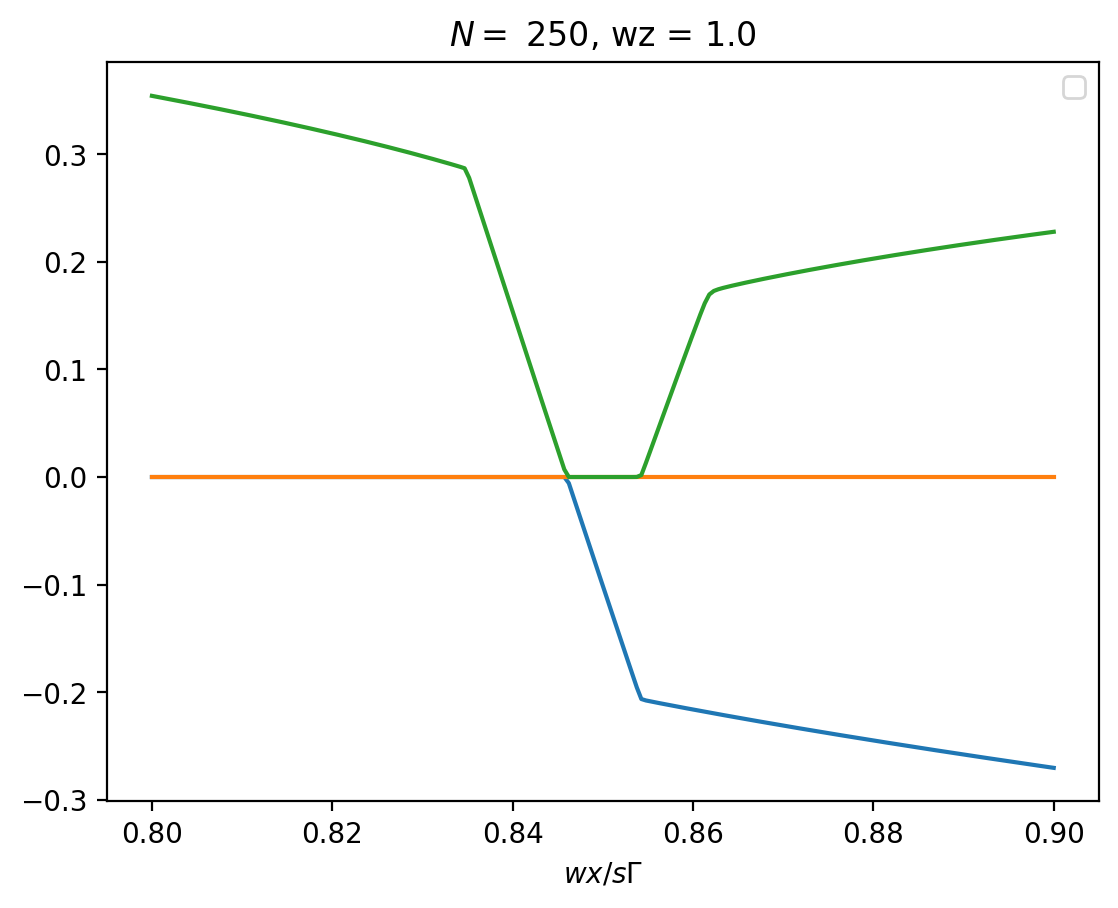

In [85]:
N = 250

G = 1
s = 1 / 2
wz = 1.0 * s * G
wxs = np.linspace(0.8, 0.9, 200) * s * G


e0 = np.empty(len(wxs))
e1 = np.empty(len(wxs))
e2 = np.empty(len(wxs))
energies = []
for i, wx in enumerate(wxs):
    H_big = antiferro_hom_unfrustrated_big_spins(wx, wz, G, N, s)
    vals = lanczos_ed(H_big, k=3)
    e0[i] = vals[0]
    e1[i] = vals[1]
    e2[i] = vals[2]
    energies.append(vals - vals[1])

plt.plot(wxs / (s * G), e1 - e0, label=r"$\Delta_{10}$")
plt.plot(wxs / (s * G), e2 - e1, label=r"$\Delta_{21}$")
plt.plot(wxs / (s * G), e2 - e0, label=r"$\Delta_{20}$")
plt.axhline(0, c="k", lw=0.5, zorder=0)

# plt.axvline(1, c='k', ls='dotted', zorder=0)
plt.xlabel(r"$wx/s\Gamma$")
# plt.ylabel(r'$\Delta_{10}/N$')
# plt.ylim(-0.6, -0.4)
# plt.xlim(1.5, 2.5)
plt.legend()
plt.title(rf"$N =$ {N}, wz = {wz/(s*G)}")
plt.show()

plt.plot(wxs / (s * G), energies)

# plt.axvline(1, c='k', ls='dotted', zorder=0)
plt.xlabel(r"$wx/s\Gamma$")
# plt.ylabel(r'$\Delta_{10}/N$')
# plt.ylim(-0.6, -0.4)
# plt.xlim(1.5, 2.5)
plt.legend()
plt.title(rf"$N =$ {N}, wz = {wz/(s*G)}")
plt.show()

/var/folders/54/wwvz2d1s1v7ck12y_l10q3pw0000gn/T/ipykernel_12542/2876631663.py:22: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((4 * wz**4)**(1/3) - wz**2)


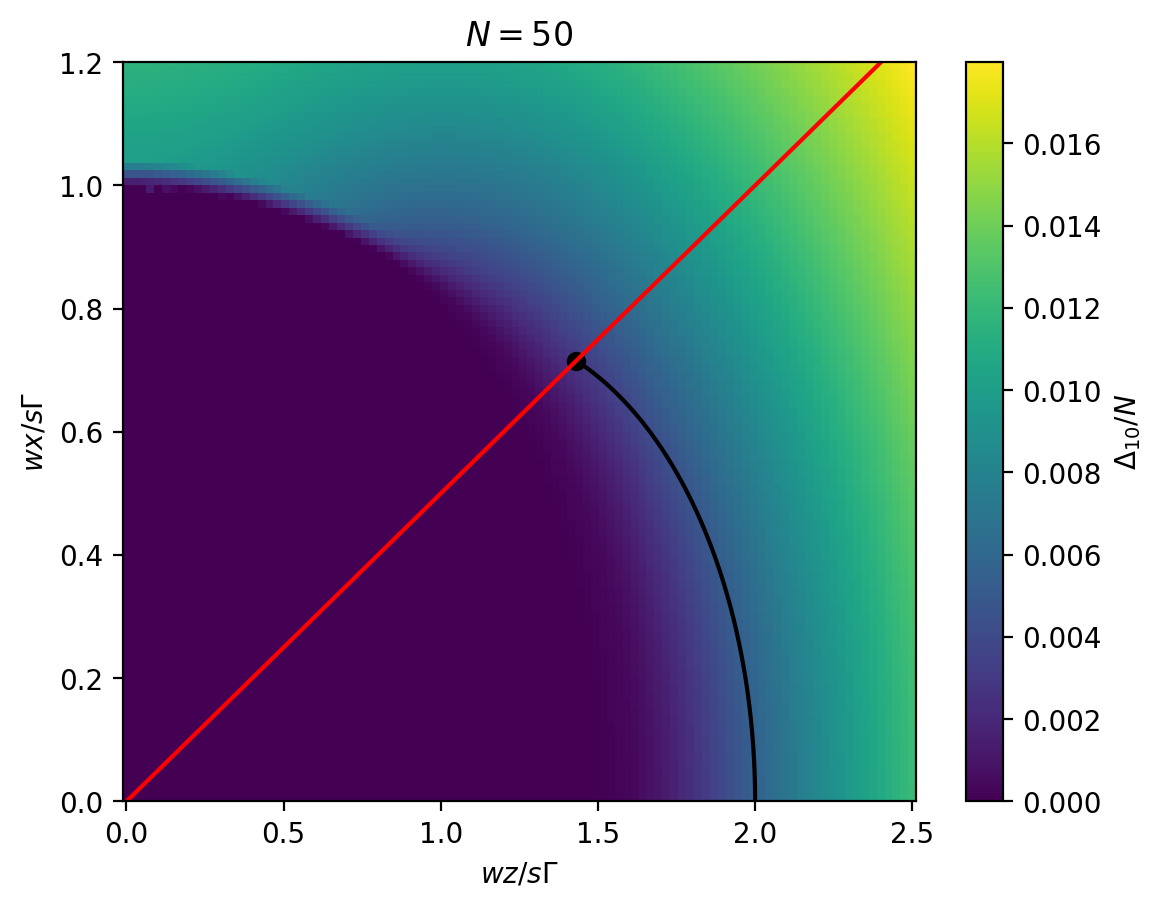

In [63]:
N = 50
G = 1
s = 1 / 2
wzs = np.linspace(0.001, 2.5, 100) * s * G
wxs = np.linspace(0.001, 1.2, 100) * s * G

gaps = np.empty((len(wzs), len(wxs)))
for i, wz in enumerate(wzs):
    for j, wx in enumerate(wxs):
        H_big = antiferro_hom_unfrustrated_big_spins(wx, wz, G, N, s)
        vals = lanczos_ed(H_big, k=2)
        gaps[i, j] = (vals[1] - vals[0]) / N

plt.pcolormesh(wzs / (s * G), wxs / (s * G), gaps.T, cmap="viridis")
plt.colorbar(label=r"$\Delta_{10}/N$")
plt.xlabel(r"$wz / s\Gamma$")
plt.ylabel(r"$wx / s\Gamma$")
plt.title(rf"$N =${N}")


# --------- second order line and multicritical point ------------
def second_order_line(wz):
    return np.sqrt((4 * wz**4) ** (1 / 3) - wz**2)


supercritical_pt = 2 * (4 / 5) ** (3 / 2)
wzs_dense = np.linspace(supercritical_pt, 2, 100000)
plt.plot(wzs_dense, second_order_line(wzs_dense), c="k")
plt.plot(supercritical_pt, second_order_line(supercritical_pt), lw=0, marker="o", c="k")
# --------- second order line and multicritical point ------------
plt.plot(wzs / (s * G), wzs / 2 / (s * G), c="r")
plt.ylim(0, 1.2)

plt.show()